In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl

In [15]:
dfv= pd.read_csv("Valencia_IQR.csv")
dfv.head(5)

,Unnamed: 0,fuente,nombre,descripción,descripción general del vecindario,nombre_host,tiempo_respuesta_host,tasa_respuesta_host,tasa_de_aceptación_host,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_comunicación,review_scores_location,review_scores_value,calculado_host_listings_count,listados_host_calculados_recuento_casas_enteras,calculado_host_listings_count_private_rooms,calculado_host_listings_count_shared_rooms,reseñas_por_mes
0,0,city scrape,Precioso apartamento con wifi,Second floor on a farm from the late 19th cent...,Very close neighborhood to the city's old town...,Antonio,within a few hours,100%,0.93,f,...,4.63,4.84,4.79,4.51,4.52,4.0,4.0,0.0,0,1.01
1,1,city scrape,PENTHOUSE ON FRONT LINE BEACH,Sin descripción,No cuenta con descripción,Cpi GestiÃ³n Encuentra Tu MansiÃ³n,within an hour,100%,0.93,f,...,5.00,5.00,5.00,4.00,4.00,5.0,5.0,0.0,0,0.01
2,2,city scrape,1900 Style Valencian Beach Home for 10px,Typical town house with 5 bedrooms and 4 bathr...,"Surrounded by historic houses, authentic res...",Susana Barbara,within an hour,100%,1.00,f,...,4.55,4.84,4.89,4.60,4.63,1.0,1.0,0.0,0,1.68
3,3,city scrape,â˜… Architectural touch! â˜…,"Hola! I am ready to welcome you in my apt., wh...",Just outside the old city centre (one block aw...,InÃ©s,within an hour,86%,1.00,n,...,4.88,4.89,4.87,4.84,4.85,6.0,6.0,0.0,0,3.31
4,4,city scrape,Apartment near downtown,Sin descripción,It's a neighborhood with all amenities. 200 me...,Maria Jesus,within an hour,93%,0.80,f,...,4.44,4.74,4.78,4.52,4.41,8.0,5.0,0.3,0,1.17


__PRECIO VS TASA DE ACEPTACIÓN HOST__

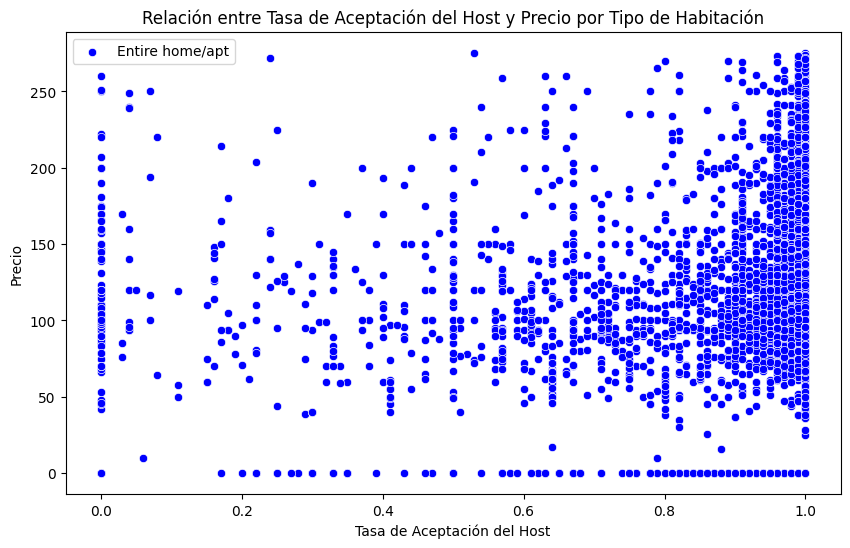

In [ ]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['tasa_de_aceptación_host', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tasa_de_aceptación_host', y='precio', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre Tasa de Aceptación del Host y Precio por Tipo de Habitación")
plt.xlabel("Tasa de Aceptación del Host")
plt.ylabel("Precio")
plt.legend()
plt.show()

TypeError: 'Axes' object is not subscriptable

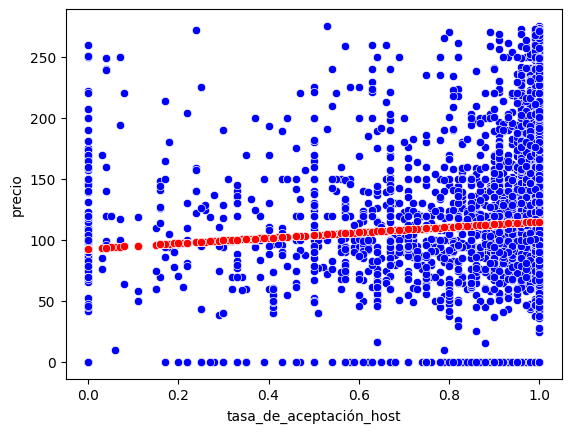

In [17]:
vars_Indep= df_entire_room[['tasa_de_aceptación_host']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['tasa_de_aceptación_host']])
y_pred

df_entire_room.insert(0, 'Predicc', y_pred)
df_entire_room

sns.scatterplot(x='tasa_de_aceptación_host', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='tasa_de_aceptación_host', y='Predicc', color='red', data=df_entire_room)[['tasa_de_aceptación_host']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['tasa_de_aceptación_host']])
y_pred

df_entire_room.insert(0, 'Pr1', y_pred)
df_entire_room

sns.scatterplot(x='tasa_de_aceptación_host', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='tasa_de_aceptación_host', y='Pr1', color='red', data=df_entire_room)

__PRECIO vs TIPO HABITACIÓN__

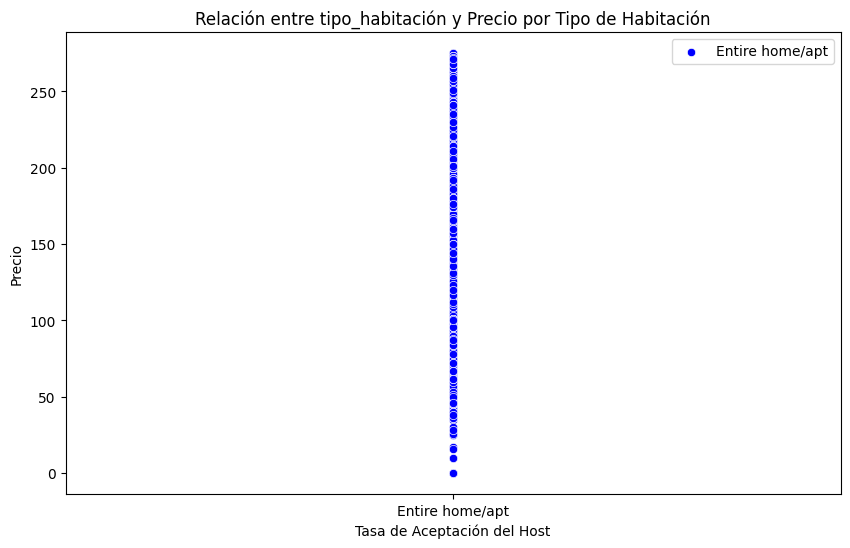

In [21]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['tipo_habitación', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tipo_habitación', y='precio', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre tipo_habitación y Precio por Tipo de Habitación")
plt.xlabel("Tasa de Aceptación del Host")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [22]:
df_entire_room['tipo_habitación'] = df_entire_room['tipo_habitación'].map({'Private room': 3})

In [23]:
df_entire_room['tipo_habitación'] = df_entire_room['tipo_habitación'].fillna(df_entire_room['tipo_habitación'].mean())

In [24]:
data12=df_entire_room["tipo_habitación"] = df_entire_room["tipo_habitación"].fillna("0")

<Axes: xlabel='tipo_habitación', ylabel='precio'>

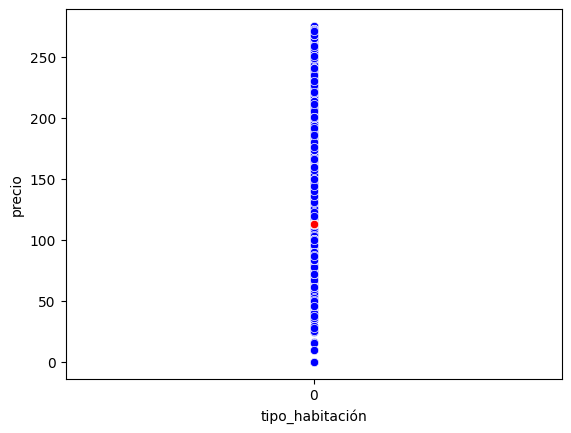

In [25]:
vars_Indep= df_entire_room[['tipo_habitación']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['tipo_habitación']])
y_pred

df_entire_room.insert(0, 'Pre2', y_pred)
df_entire_room

sns.scatterplot(x='tipo_habitación', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='tipo_habitación', y='Pre2', color='red', data=df_entire_room)

__PRICE vs HOST IS SUPERHOST__

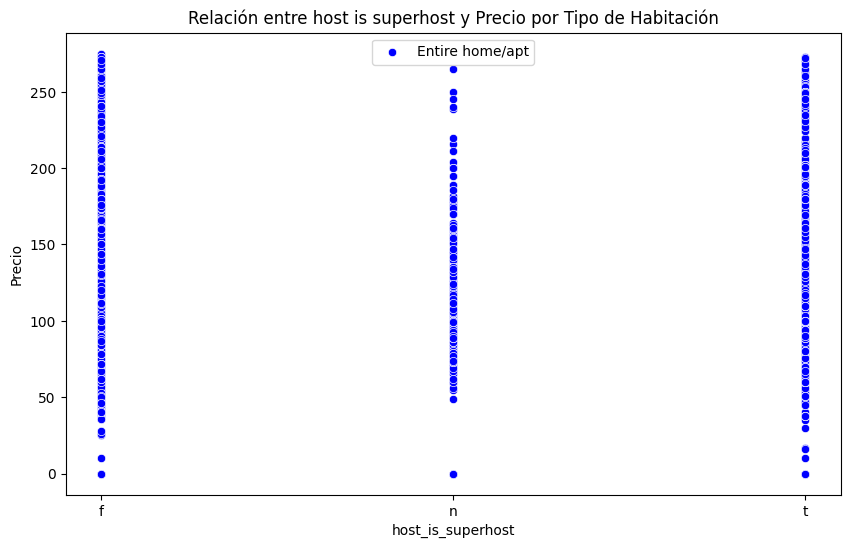

In [27]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['host_is_superhost', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='host_is_superhost', y='precio', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre host is superhost y Precio por Tipo de Habitación")
plt.xlabel("host_is_superhost")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [28]:
df_entire_room['host_is_superhost'] = df_entire_room['host_is_superhost'].map({'f': 0, 't': 1, 'n':0.5})

<Axes: xlabel='host_is_superhost', ylabel='precio'>

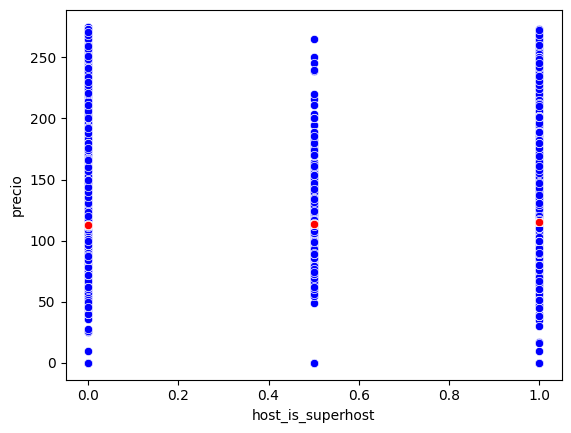

In [29]:
vars_Indep= df_entire_room[['host_is_superhost']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['host_is_superhost']])
y_pred

df_entire_room.insert(0, 'Pre2', y_pred)
df_entire_room

sns.scatterplot(x='host_is_superhost', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='host_is_superhost', y='Pre2', color='red', data=df_entire_room)

__accommodates vs bathrooms__

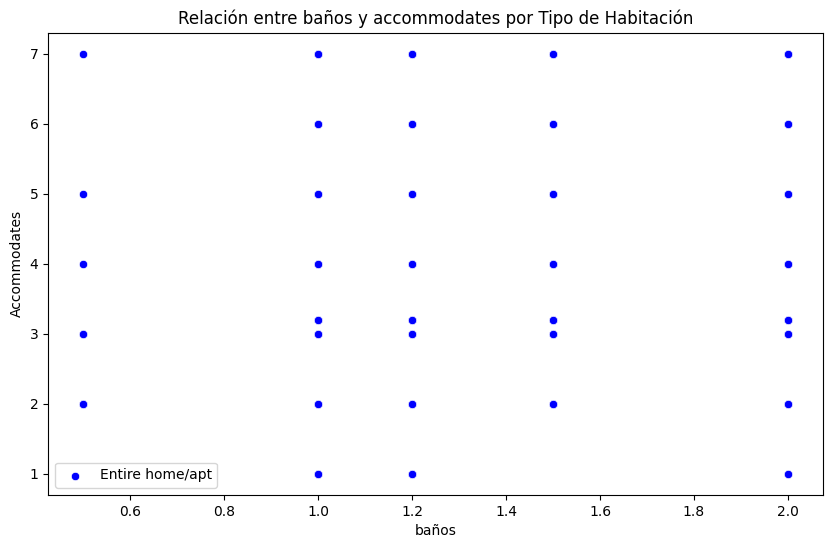

In [30]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['baños', 'se_adapta'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='baños', y='se_adapta', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre baños y accommodates por Tipo de Habitación")
plt.xlabel("baños")
plt.ylabel("Accommodates")
plt.legend()
plt.show()

<Axes: xlabel='baños', ylabel='se_adapta'>

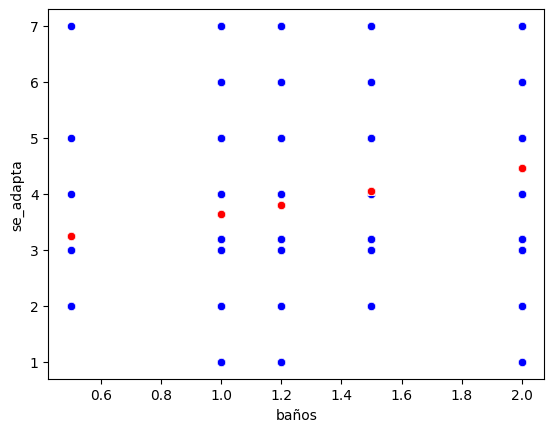

In [31]:
vars_Indep= df_entire_room[['baños']]
Vars_Dep= df_entire_room['se_adapta']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['baños']])
y_pred

df_entire_room.insert(0, 'Pre3', y_pred)
df_entire_room

sns.scatterplot(x='baños', y='se_adapta', color='blue', data=df_entire_room)
sns.scatterplot(x='baños', y='Pre3', color='red', data=df_entire_room)

__price vs review_scores_cleanliness__

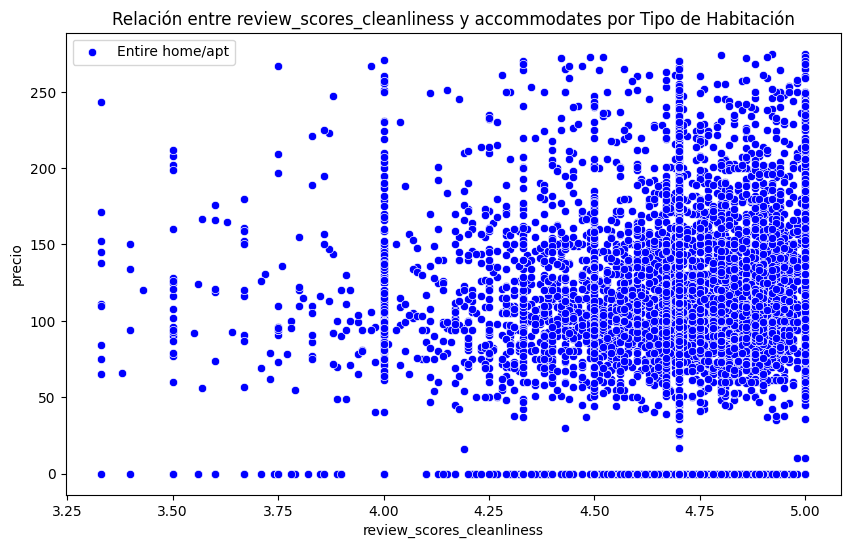

In [35]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['review_scores_cleanliness', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_cleanliness', y='precio', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre review_scores_cleanliness y accommodates por Tipo de Habitación")
plt.xlabel("review_scores_cleanliness")
plt.ylabel("precio")
plt.legend()
plt.show()

<Axes: xlabel='review_scores_cleanliness', ylabel='precio'>

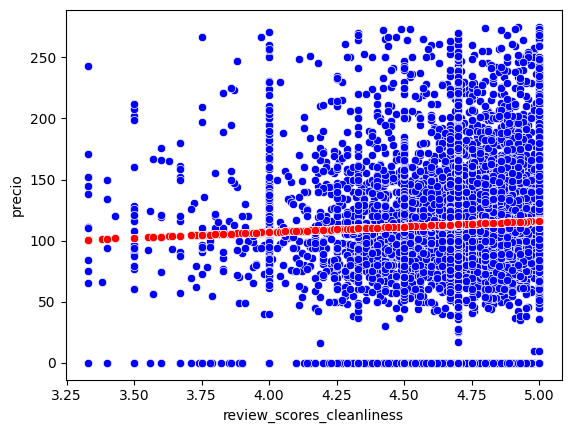

In [36]:
vars_Indep= df_entire_room[['review_scores_cleanliness']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['review_scores_cleanliness']])
y_pred

df_entire_room.insert(0, 'Predicc', y_pred)
df_entire_room

sns.scatterplot(x='review_scores_cleanliness', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='review_scores_cleanliness', y='Predicc', color='red', data=df_entire_room)

__price vs número_de_reseñas__

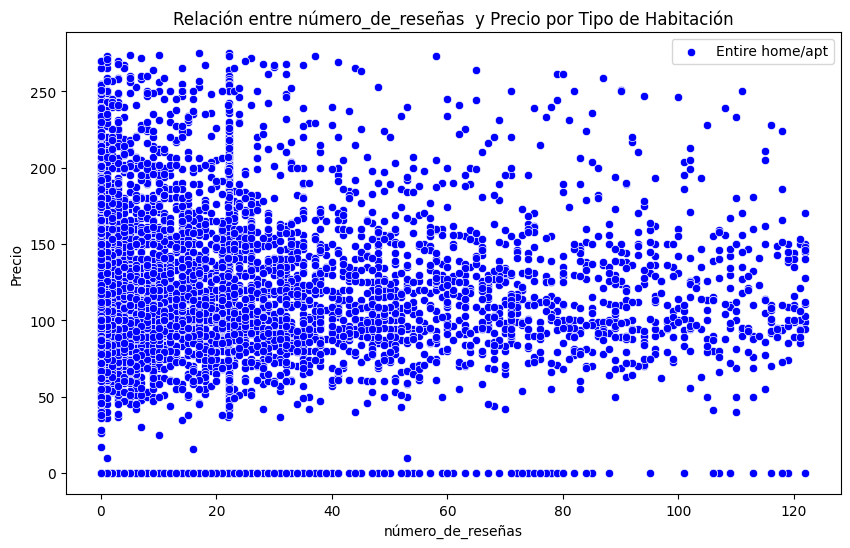

In [ ]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['número_de_reseñas', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='número_de_reseñas', y='precio', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre número_de_reseñas  y Precio por Tipo de Habitación")
plt.xlabel("número_de_reseñas")
plt.ylabel("Precio")
plt.legend()
plt.show()

<Axes: xlabel='número_de_reseñas', ylabel='precio'>

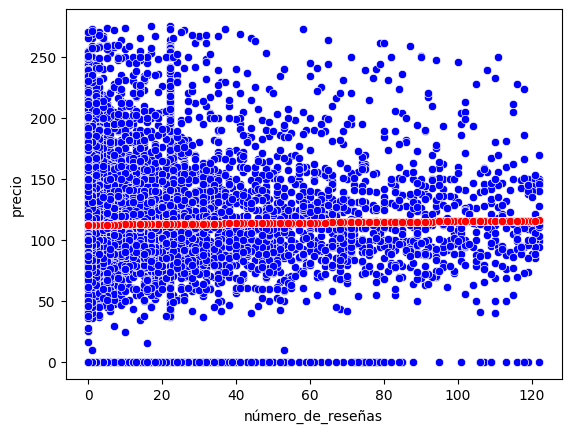

In [39]:
vars_Indep= df_entire_room[['número_de_reseñas']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['número_de_reseñas']])
y_pred

df_entire_room.insert(0, 'Predic', y_pred)
df_entire_room

sns.scatterplot(x='número_de_reseñas', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='número_de_reseñas', y='Predic', color='red', data=df_entire_room)

__price vs instant_bookable__

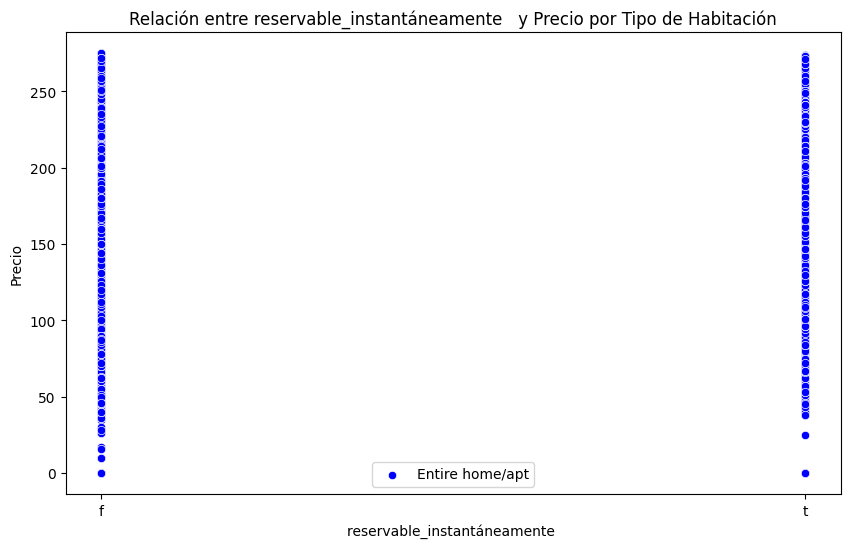

In [40]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['reservable_instantáneamente', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reservable_instantáneamente', y='precio', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre reservable_instantáneamente   y Precio por Tipo de Habitación")
plt.xlabel("reservable_instantáneamente ")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [41]:
df_entire_room['reservable_instantáneamente'] = df_entire_room['reservable_instantáneamente'].map({'f': 0, 't': 1})

<Axes: xlabel='reservable_instantáneamente', ylabel='precio'>

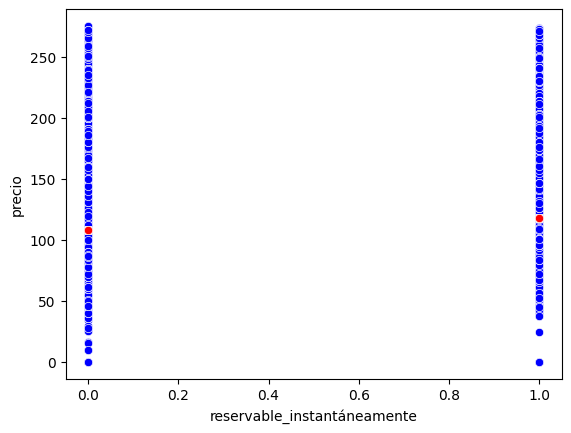

In [42]:
vars_Indep= df_entire_room[['reservable_instantáneamente']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['reservable_instantáneamente']])
y_pred

df_entire_room.insert(0, 'Predi', y_pred)
df_entire_room

sns.scatterplot(x='reservable_instantáneamente', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='reservable_instantáneamente', y='Predi', color='red', data=df_entire_room)

__Price vs property_type__

In [43]:
frecuencias = dfv['tipo_propiedad'].value_counts()
dfv['tipo_propiedad'] = dfv['tipo_propiedad'].map(frecuencias)
print(dfv[['tipo_propiedad']])

      tipo_propiedad
0               5446
1               5446
2                240
3               5446
4               5446
...              ...
9442            2064
9443            5446
9444             127
9445            5446
9446            5446

[9447 rows x 1 columns]


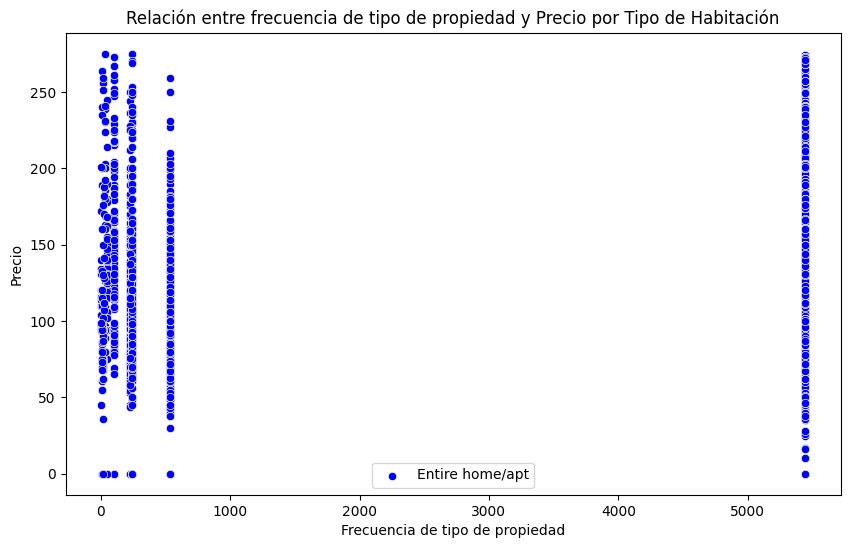

In [45]:
f_e_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['tipo_propiedad', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tipo_propiedad', y='precio', data=f_e_room, color='blue', label='Entire home/apt')
plt.title("Relación entre frecuencia de tipo de propiedad y Precio por Tipo de Habitación")
plt.xlabel("Frecuencia de tipo de propiedad")
plt.ylabel("Precio")
plt.legend()
plt.show()

<Axes: xlabel='tipo_propiedad', ylabel='precio'>

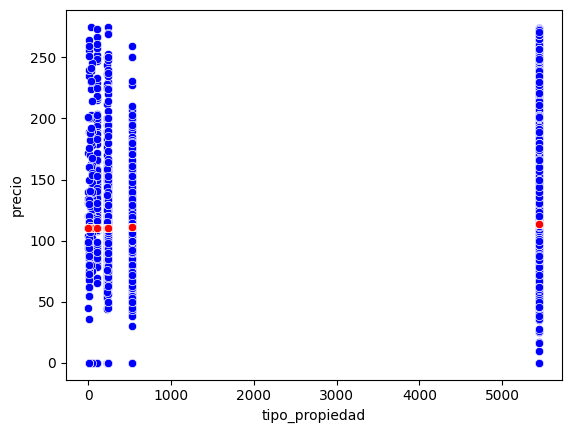

In [46]:
vars_Indep= f_e_room[['tipo_propiedad']]
Vars_Dep= f_e_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=f_e_room[['tipo_propiedad']])
y_pred

f_e_room.insert(0, 'Pre', y_pred)
f_e_room

sns.scatterplot(x='tipo_propiedad', y='precio', color='blue', data=f_e_room)
sns.scatterplot(x='tipo_propiedad', y='Pre', color='red', data=f_e_room)

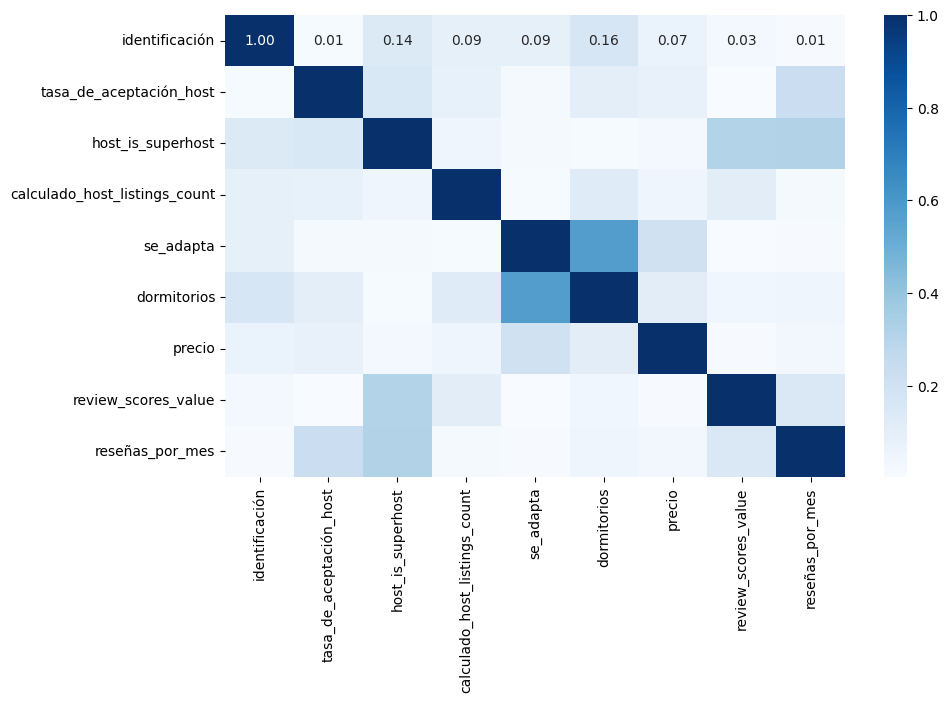

In [47]:
filtro = df_entire_room.loc[:, ["identificación", "tasa_de_aceptación_host", "host_is_superhost", "calculado_host_listings_count", "se_adapta", "dormitorios", "precio", "review_scores_value", "reseñas_por_mes"]]

# Convertir columnas categóricas en numéricas
filtro["host_is_superhost"] = filtro["host_is_superhost"].map({'t': 1, 'f': 0})  # Si 't' es True y 'f' es False
filtro["se_adapta"] = filtro["se_adapta"].astype("category").cat.codes  # Si 'se_adapta' es categórica

# Convertir otras columnas no numéricas en números si es necesario
filtro = filtro.apply(pd.to_numeric, errors='coerce')

# Calcular la correlación solo de las columnas seleccionadas
Corr_Factors = filtro.corr()

# Hacer la matriz de correlación absoluta
Corr_Factors1 = abs(Corr_Factors)

# Graficar el mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
plt.show()